## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [166]:
link = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'

indices_to_skip = np.array([0,1,2,353,354,355])

df = pd.read_csv(link,skiprows=indices_to_skip , header=1)

df.tail()


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,"10,685",3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,"5,931",2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,"199,134","1,036",6,nan,25,390,615,"2,368",470,"1,662",236,10.000
347,Yorktown Town,"36,643",15,0,nan,0,2,13,334,45,287,2,nan


In [96]:
df.shape

(348, 13)

In [167]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [168]:
# Not working:
new_cols = ['Murder','Rubberry']
def insert_cols(df):
    for i in range(len(new_cols)):
        #df[new_cols[i]]==np.nan
        return new_cols[i]
    
insert_cols(df)

'Murder'

In [170]:
# Convert the 3 columns:

# df['Murder'] = np.nan
df.loc[df['Murder and\nnonnegligent\nmanslaughter']>0,'Murder']=1
df.loc[df['Murder and\nnonnegligent\nmanslaughter']==0,'Murder']=0
df.loc[df['Robberry']>0,'Robberry']=1
df.loc[df['Robberry']==0,'Robberry']=0


In [ ]:
# This will return error b/c it is not numeric:
df['population_squared'] = df['Population']**2 

In [140]:
# Check if column is string:
if df['Population'].dtype == np.number:
    print('yes')
else:
    print('no number')

no number


In [172]:
# Which are the numeric values from columns:
a = pd.to_numeric(df['Population'], errors='coerce')#.isnull()
#type(a)
a.dropna()

12    658.000
44    762.000
48    980.000
118   526.000
136   656.000
260   997.000
266   977.000
287   872.000
319   615.000
344   829.000
Name: Population, dtype: float64

In [173]:
cols = df.columns.drop(['City','Murder and\nnonnegligent\nmanslaughter','Rape\n(revised\ndefinition)1','Arson3'])

# Replace ',' before converting to numeric:
df[cols]=df[cols].replace(',*','',regex=True)

# Convert to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [199]:
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
Murder                                    float64
Rubberry                                  float64
population_squared                          int64
dtype: object

In [175]:
# Create the column Population ^ 2:
df['population_squared'] = df['Population']**2 

In [176]:
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,Rubberry,population_squared
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000,0.000,0.000,3463321
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000,0.000,0.000,6640929
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000,0.000,0.000,8099716
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan,1.000,1.000,9595377936
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan,0.000,0.000,40806544
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan,0.000,0.000,16719921
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000,0.000,0.000,3171961
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000,1.000,1.000,13993943616
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000,0.000,0.000,90611361
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000,0.000,0.000,330585124


In [177]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,Rubberry,population_squared
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872,0.141,0.141,203554650960.236
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693,0.348,0.348,3778875542708.130
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000,0.000,0.000,9018117.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000,0.000,0.000,52325684.500
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000,0.000,0.000,339753567.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000,1.000,1.000,70494931807876.000


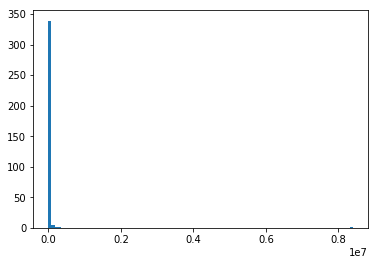

In [189]:
plt.hist(df['Population'],bins=100)
plt.show()

In [208]:
df.sort_values('Population', ascending=False)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,Rubberry,population_squared
216,New York,8396126,52384,335,nan,1112,19170,31767,141971,16606,117931,7434,nan,1.000,1.000,70494931807876
35,Buffalo,258789,3249,47,nan,145,1322,1735,12491,3458,8076,957,nan,1.000,1.000,66971746521
272,Rochester,210562,2107,42,nan,92,918,1055,10051,2587,6855,609,132.000,1.000,1.000,44336355844
346,Yonkers,199134,1036,6,nan,25,390,615,2368,470,1662,236,10.000,1.000,1.000,39654349956
310,Syracuse,143834,1192,21,nan,75,400,696,6473,1781,4298,394,57.000,1.000,1.000,20688219556
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000,1.000,1.000,13993943616
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan,1.000,1.000,9595377936
126,Greece Town,96667,151,0,nan,9,60,82,2303,332,1925,46,nan,0.000,0.000,9344508889
267,Ramapo Town,87204,57,2,nan,5,9,41,567,88,466,13,nan,1.000,1.000,7604537616
57,Clarkstown Town,80705,65,0,nan,8,17,40,1515,99,1388,28,nan,0.000,0.000,6513297025


In [227]:
val_cols = df.columns.drop(['City','Rape\n(revised\ndefinition)1'])
val_cols

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'Murder',
       'Rubberry', 'population_squared'],
      dtype='object')

In [209]:
# Drop values that are outliers (more than 3 stdev from the mean):
q = df["Population"].quantile(0.99)
df=df[df["Population"] < q].sort_values('Population', ascending=False).head(10)

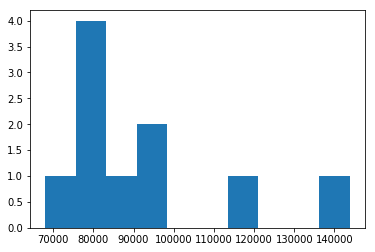

In [212]:
plt.hist(df['Population'])
plt.show()

In [ ]:
plt.hist(df['Population'])
plt.show()

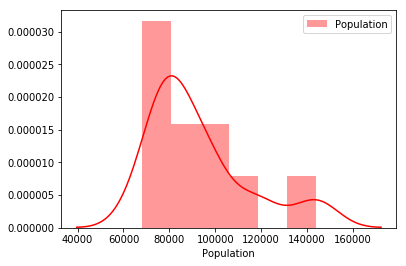

In [217]:
import seaborn as sns

sns.distplot( df["Population"] , color="red", label="Population",bins=6)
plt.legend()
plt.show()

ValueError: cannot copy sequence with size 10 to array axis with dimension 14

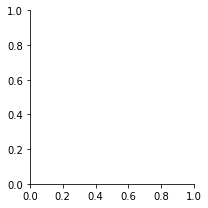

In [239]:
g = sns.FacetGrid(df, palette="Set1")
g = (g.map(sns.distplot, df[val_cols], hist=False, rug=True))

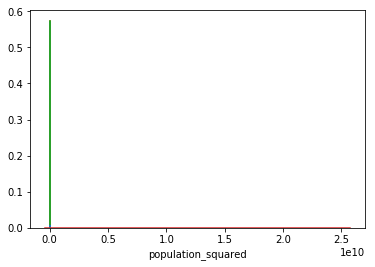

In [228]:
for col_id in val_cols:
    sns.distplot(df[col_id].dropna())

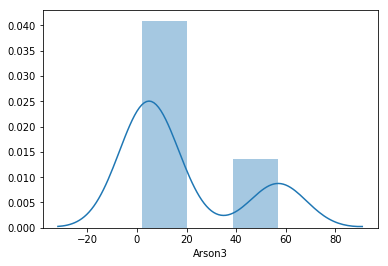

In [232]:
sns.distplot(df['Arson3'].dropna())